<h1><center> Analysis of urban versus rural living</center></h1>
![](https://sustainabilityatspu.files.wordpress.com/2014/01/urban-and-rural.jpg?w=1097&h=784)

## Alcohol y Tabaquismo

En el siguiente informe, se analizarán 2 variables de interés del dataset: **Alcohol** y **Smoking** (Tabaquismo), ya que creemos que ambas pueden estar relacionadas, teniendo en cuenta factores sociales.

In [87]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
from scipy import stats

#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [88]:
young = pd.read_csv('../../datasets/from_our_childhood.csv')

### Análisis de estadísticos

Para ver la relación entre estas variables, se calcularán las probabilidades marginales y conjuntas, también se verá el nivel de correlación entre ambas y por último se realizará un test de chi cuadrado sobre la independencia de dichas variables.

Probabilidad Marginal de la variable Alcohol


,Alcohol
social drinker,0.655721
drink a lot,0.220896
never,0.123383


Probabilidad Marginal de la variable Smoking


,Smoking
tried smoking,0.429142
never smoked,0.207585
current smoker,0.188623
former smoker,0.174651


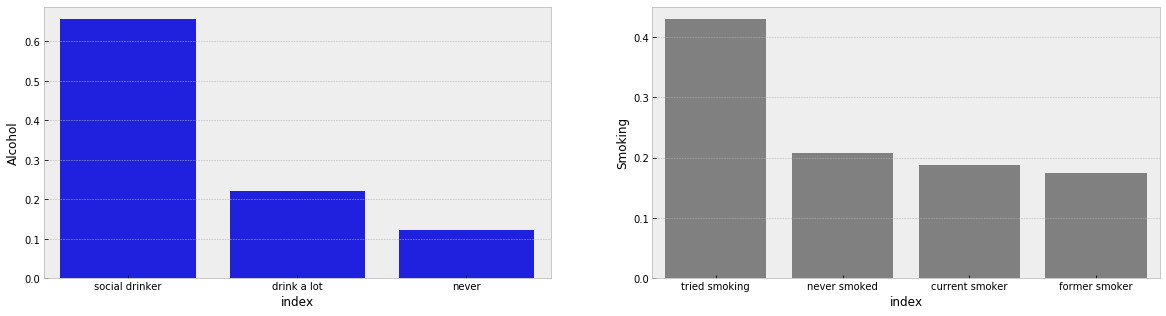

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

def plot_marginal_probability(dataset, var_name, color, ax):
    data = young[var_name].value_counts(normalize=True, dropna=True).to_frame()
    display(data)

    sns.barplot(
        data=data.reset_index(),
        x='index',
        y=var_name,
        color=color,
        orient='v',
        ax=ax
    )

print('Probabilidad Marginal de la variable Alcohol')
plot_marginal_probability(young, 'Alcohol', 'blue', ax[0])

print('Probabilidad Marginal de la variable Smoking')
plot_marginal_probability(young, 'Smoking', 'Grey', ax[1])

#### Probabilidad Conjunta de las variables Alcohol y Smoking

In [90]:
# Joint Probability
pd.crosstab(young.Alcohol, young.Smoking, normalize = True, margins = True)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,0.078,0.055,0.015,0.072,0.220
never,0.011,0.011,0.061,0.039,0.122
social drinker,0.099,0.109,0.131,0.319,0.658
All,0.188,0.175,0.207,0.430,1.000


Se puede ver que es muy común haber intenado fumar y ser un bebedor social, lo cual indica que estos hábitos tienen una gran característica social.

In [91]:
# Conditional Probability Table
# Changing a categorical column to be able to do correlation
# Make sure not to change the original dataset
alcohol_smoking = young[['Smoking', 'Alcohol', 'Gender']].copy()
alcohol_smoking.Gender = young.Gender.astype('category').cat.codes
alcohol_smoking.Smoking = young.Smoking.astype('category').cat.codes
alcohol_smoking.Alcohol = young.Alcohol.astype('category').cat.codes

# Correlation between 'Alcohol' and 'Smoking'
alcohol_smoking[['Alcohol', 'Smoking']].corr().Alcohol.Smoking

0.23614548946760536

Como se puede observar del cálculo de correlación entre las variables, se puede decir que si bien es positiva no es lo suficientemente fuerte para decir que la relación es estrictamente lineal. Veamos que pasa en el caso de disgregarlo por género: 

In [92]:
# Correlation between 'Alcohol' and 'Smoking' for female
# female == 0
# male == 1
female_smoking_alcohol = alcohol_smoking[alcohol_smoking.Gender == 0]
female_smoking_alcohol[['Alcohol', 'Smoking']].corr().Alcohol.Smoking

0.24639137114126905

In [93]:
# Correlation between 'Alcohol' and 'Smoking' for male
male_smoking_alcohol = alcohol_smoking[alcohol_smoking.Gender == 1]
male_smoking_alcohol[['Alcohol', 'Smoking']].corr().Alcohol.Smoking

0.2275309644975181

El disgregarlo no dio ningún dato significativo que valga la pena destacar. El hecho de que en las mujeres la correlación sea un poco más fuerte no implica que las mismas tiendan a tomar y fumar más que los hombres.

#### Gráfico de probabilidad conjunta

En el siguiente gráfico se puede apreciar la tabla de probabilidad conjunta, presentada anteriormente, para las variables 'Alcohol' y 'Smoking'.

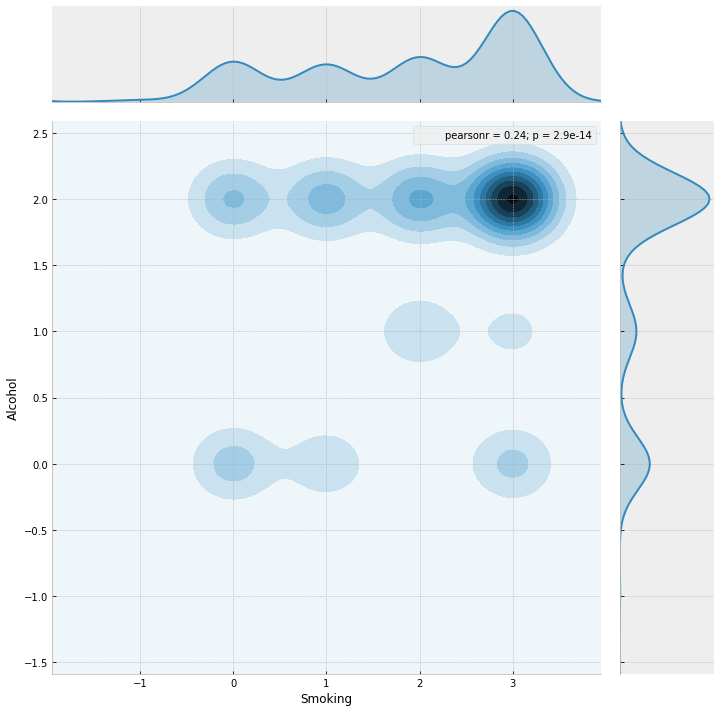

In [94]:
sns.jointplot('Smoking', 'Alcohol', data=alcohol_smoking, kind="kde", size=10);

#### Test de chi cuadrado

Presentaremos un análisis de la independencia entre las variables 'Smoking' y 'Alcohol'. Para la misma se realizará un test de chi cuadrado con las siguientes hipótesis:
   * $H_0$ = 'Fumar y tomar alcohol son dos variables independientes'
   * $H_1$ = 'Existe dependencia entre fumar y tomar alcohol'
   
Se intentará probar que existe una dependencia, es decir, que $H_1$ es válida. Para esto primero se procederá a analizar la tabla de frecuencia observadas y marginales para dichas variables.

In [95]:
pd.crosstab(young.Alcohol, young.Smoking, margins = True)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,78,55,15,72,220
never,11,11,61,39,122
social drinker,99,109,131,319,658
All,188,175,207,430,1000


Es posible observar en la tabla que la gran mayoría de los fumadores activos bebe. Del total de estos, un **41%** bebe mucho y un **52%** es un bebedor social reflejando que el **93%** de la gente que fuma activamente bebe.

Lo mismo se puede observar entre las personas que intentaron fumar. De esta categoría el **91%** bebe mucho o es un bebedor social lo cual nos lleva a inferir que hay una relación entre ambas variables.

Para poder realizar una prueba de independencia de chi cuadrado es necesario además tener una tabla de las frecuencias esperadas. Mientras más se acerquen los valores observados a los esperados, el valor del estadístico se acercara a 0 avalando $H_0$. Caso contrario, si los valores son muy dispares se rechazaría la hipótesis nula.

In [96]:
# Observed frecuency
observed_frecuency = pd.crosstab(young.Alcohol, young.Smoking)

# Calculate the chi-square results through scipy special function 'chi2_contigency'
[value, p_value, g, frequency_array] = stats.chi2_contingency(observed_frecuency)

# Expected frecuency
expected_frecuency = pd.DataFrame(frequency_array, columns=observed_frecuency.columns, index=observed_frecuency.index)
# Add total per row and column
expected_frecuency['All'] = expected_frecuency.sum(axis=1)
expected_frecuency.loc['All']= expected_frecuency.sum()
expected_frecuency

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,41.360,38.50,45.540,94.60,220.0
never,22.936,21.35,25.254,52.46,122.0
social drinker,123.704,115.15,136.206,282.94,658.0
All,188.000,175.00,207.000,430.00,1000.0


In [97]:
print('estadístico chi cuadrado (experimental): {}\n'.format(value))
print('p-valor: {}\n'.format(p_value))
print('Grados de libertad: {}\n'.format(g))

estadístico chi cuadrado (experimental): 140.7461035508088

p-valor: 6.974221284156533e-28

Grados de libertad: 6



Si comparamos el valor del estadístico chi-cuadrado experiemental con el valor crítico del modelo veremos que si tomamos un $ \alpha = 0.05 $ con **6** grados de libertad

 $ \chi^2_{experimental}\  \gt \  \chi^2_{6, 0.05} $
 
 $ 140.746\  \gt \ 12.592 $
 
 
 Lo cual nos lleva la conclusión de que debemos rechazar la hipótesis nula por existir dependencia entre ambas variables. No se puede decir con exactitud que beber conlleve a fumar o viceversa, pero podemos inferir por lo analizado anteriormente que la dependencia entre las variables se debe a una influencia social.